In [1]:
import timeit
from keras.models import Model,Sequential
from keras.layers import Input, Embedding, LSTM, Dense,concatenate,  Dropout, Flatten
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import RMSprop, adam
from keras.optimizers import SGD
from keras.datasets import mnist
import tensorflow as tf

import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
############################################################################

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
import os

numpy.random.seed(110)

C:\Users\BRG_user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def power_(x,n):                                        
    return  np.power(x, n)
###############################################################################
def sigmoid_array(x):                                        
    return 1 / (1 + np.exp(-x))
###############################################################################
def exp_(x):                                        
    return  np.exp(x)
###############################################################################
def log_(x):                                        
    return  np.log(x)
###############################################################################
def plot_(history):
    training_loss1 = history.history['loss']
    test_loss1 = history.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show();
###############################################################################
def generate_random( shape_1,shape_2):
    temp= np.random.random(shape_1*shape_2)
    temp1=temp.reshape(shape_1,shape_2)
    return temp1
###############################################################################
def fun_1(x):
    return 1/2*power_(x, 2)-5*sigmoid_array(x)
###############################################################################
def fun_2(x):
    return 6*power_(x, 5)-3*sigmoid_array(x)+exp_(x)-9*log_(x)
###############################################################################
def fun_3(x):
    return 22*power_(x, 20)+sigmoid_array(x)+2*exp_(x)+5*log_(x)
###############################################################################


In [3]:

def plot_loss(size,in_1,in_2,in_3,in_4,in_5,in_6):

    plt.figure(figsize=(20,10))
    plt.subplot(231)
    training_loss1 = in_1.history['loss']
    test_loss1 = in_1.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, size)
    plt.title('Architure 1')


    plt.subplot(232)
    training_loss1 = in_2.history['loss']
    test_loss1 = in_2.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, size)
    plt.title('Architure 2')



    plt.subplot(233)
    training_loss1 = in_3.history['loss']
    test_loss1 = in_3.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, size)
    plt.title('Architure 3')



    plt.subplot(234)
    training_loss1 = in_4.history['loss']
    test_loss1 = in_4.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, size)
    plt.title('Architure 4')
    
    

    plt.subplot(235)
    training_loss1 = in_5.history['loss']
    test_loss1 = in_5.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, size)
    plt.title('Architure 5')

    
    
    plt.subplot(236)
    training_loss1 = in_6.history['loss']
    test_loss1 = in_6.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, size)
    plt.title('Our Architure ')



    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.0010, right=0.95, hspace=0.25,
                        wspace=0.1)

    plt.show()

In [4]:

def plot_shape(in_1,in_2,in_3,in_4,in_5,in_6):

    plt.figure(figsize=(20,10))
    
    plt.subplot(231)
    plt.plot(in_1[0], in_1[1])
    plt.plot(in_1[0], in_1[2])


    plt.subplot(232)
    plt.plot(in_2[0], in_2[1])
    plt.plot(in_2[0], in_2[2])



    plt.subplot(233)
    plt.plot(in_3[0], in_3[1])
    plt.plot(in_3[0], in_3[2])



    plt.subplot(234)
    plt.plot(in_4[0], in_4[1])
    plt.plot(in_4[0], in_4[2])

    plt.subplot(235)
    plt.plot(in_5[0], in_5[1])
    plt.plot(in_5[0], in_5[2])
    
    
    plt.subplot(236)
    plt.plot(in_6[0], in_6[1])
    plt.plot(in_6[0], in_6[2])


    plt.subplots_adjust(top=0.9, bottom=0.08, left=0.0010, right=0.95, hspace=0.1,
                        wspace=0.1)

    plt.show()


In [5]:
dim_train=1000
dim_test=200

X_train_temp=generate_random(dim_train,3)
Y_train_temp=generate_random(dim_train,3)

X_test_temp=generate_random(dim_test,3)
Y_test_temp=generate_random(dim_test,3)

    
Y_train_temp[:,0]=fun_1(X_train_temp[:,0])
Y_train_temp[:,1]=fun_2(X_train_temp[:,1])
Y_train_temp[:,2]=fun_3(X_train_temp[:,2])
    

Y_test_temp[:,0]=fun_1(X_test_temp[:,0])
Y_test_temp[:,1]=fun_2(X_test_temp[:,1])
Y_test_temp[:,2]=fun_3(X_test_temp[:,2])

In [6]:

number_epo=25
input_dim=1
output_dim=1

In [7]:
model = Sequential()
model.add(Dense(10, input_dim=input_dim, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(30, activation='tanh'))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(output_dim, activation='tanh'))
model.add(Dropout(0.2))
#model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

Run Time : 5.114598


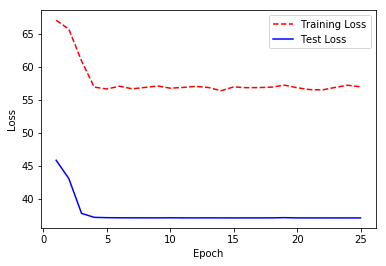

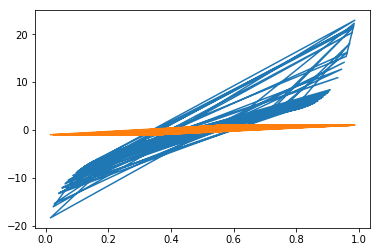

In [8]:
column=2
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]
# F_3_archicture_1_


start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

F_3_archicture_1=[X_test,Y_test,predict,history]

Run Time : 2.452355


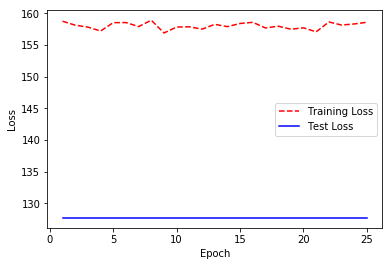

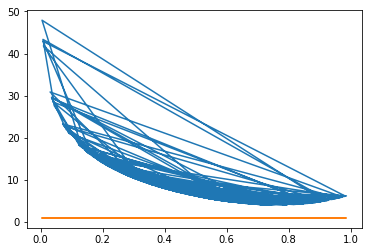

In [9]:
column=1
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]

#F_2_archicture_1

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)


F_2_archicture_1=[X_test,Y_test,predict,history]

Run Time : 2.464088


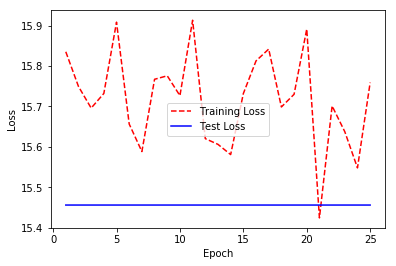

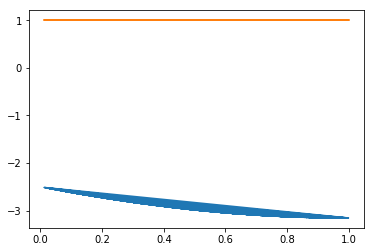

In [10]:
column=0
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]

#F_1_archicture_1

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

F_1_archicture_1=[X_test,Y_test,predict,history]

In [11]:
model = Sequential()
model.add(Dense(5, input_dim=input_dim, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(18, activation='relu'))
model.add(Dense(15, activation='tanh'))
model.add(Dense(18, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim, activation='relu'))
#model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

Run Time : 4.503835


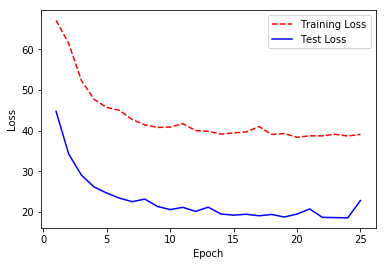

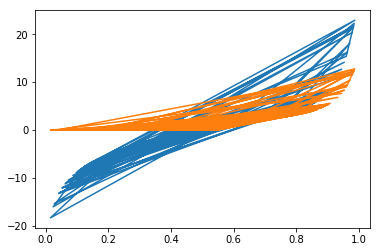

In [12]:
archicture_2=[]
column=2
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_3_archicture_2


start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

F_3_archicture_2=[X_test,Y_test,predict,history]


Run Time : 2.570303


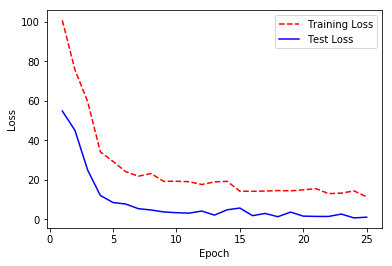

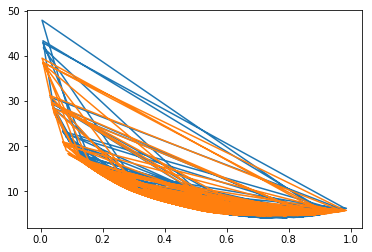

In [13]:
column=1
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_2_archicture_2


start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)
F_2_archicture_2=[X_test,Y_test,predict,history]


Run Time : 2.570769


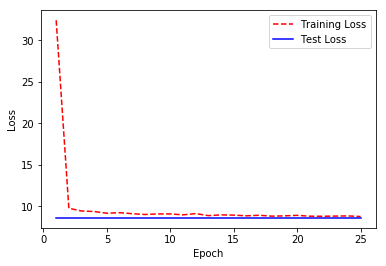

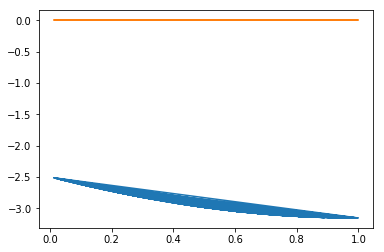

In [14]:
column=0
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_1_archicture_2


start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

F_1_archicture_2=[X_test,Y_test,predict,history]


In [15]:
model = Sequential()
model.add(Dense(5, input_dim=input_dim, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(15, activation='relu'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim, activation='relu'))
#model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

Run Time : 5.108524


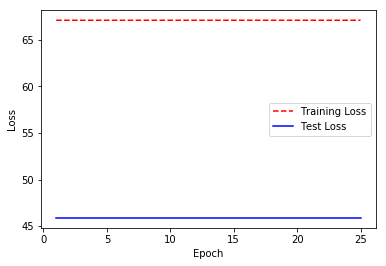

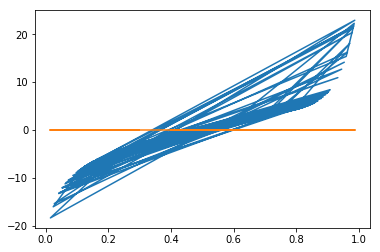

In [16]:
column=2
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_3_archicture_3

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

F_3_archicture_3=[X_test,Y_test,predict,history]


Run Time : 2.760288


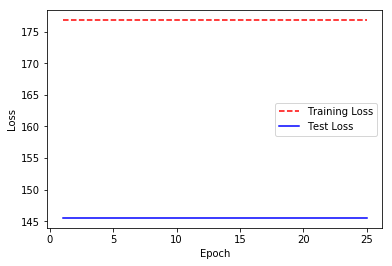

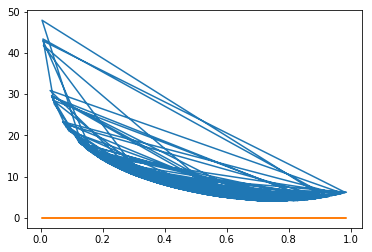

In [17]:
column=1
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_2_archicture_3

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)
F_2_archicture_3=[X_test,Y_test,predict,history]


Run Time : 3.201286


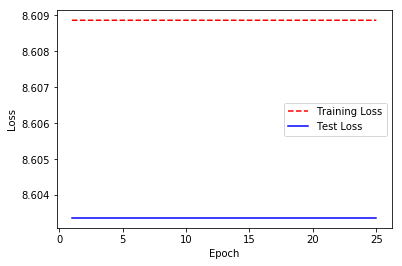

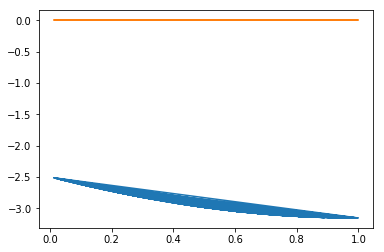

In [18]:
column=0
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_1_archicture_3

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)


F_1_archicture_3=[X_test,Y_test,predict,history]


In [19]:
model = Sequential()
model.add(Dense(40, input_dim=input_dim, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim, activation='relu'))
model.add(Dropout(0.2))
#model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

Run Time : 3.480914


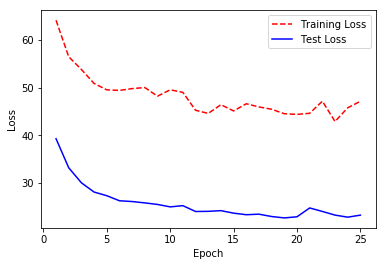

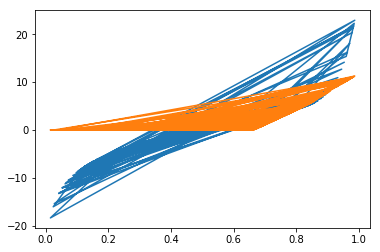

In [20]:
column=2
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_3_archicture_4

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

F_3_archicture_4=[X_test,Y_test,predict,history]


Run Time : 1.879261


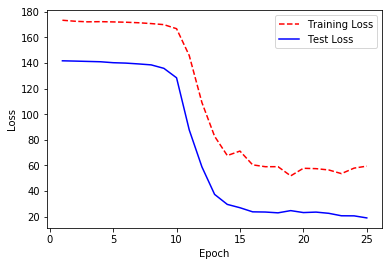

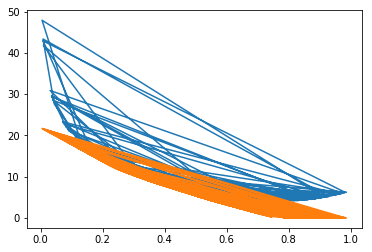

In [21]:

column=1
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_2_archicture_4

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

F_2_archicture_4=[X_test,Y_test,predict,history]


Run Time : 1.869316


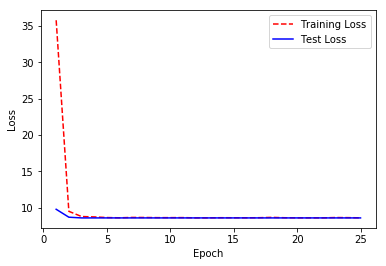

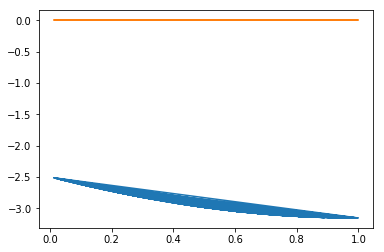

In [22]:
column=0
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_1_archicture_4

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

F_1_archicture_4=[X_test,Y_test,predict,history]


In [23]:
model = Sequential()
model.add(Dense(5, input_dim=input_dim, activation='softplus'))
model.add(Dense(10, activation='softplus'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(15, activation='relu'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(25, activation='relu'))
model.add(Dense(output_dim, activation='softplus'))
model.add(Dropout(0.2))
model.compile(loss='mean_squared_error', optimizer='adam')

Run Time : 4.922831


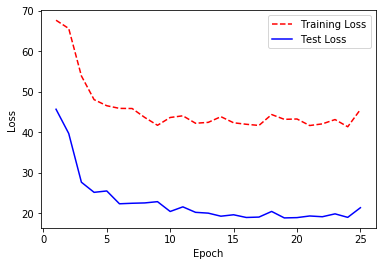

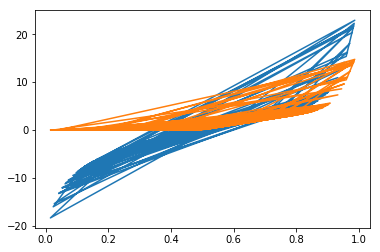

In [24]:
column=2
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_3_archicture_5

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)


F_3_archicture_5=[X_test,Y_test,predict,history]


Run Time : 2.426073


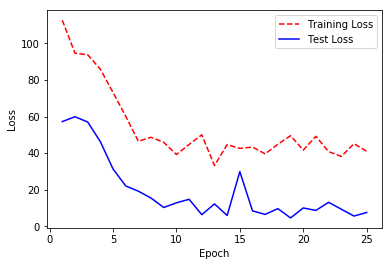

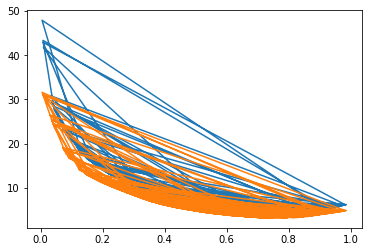

In [25]:
column=1
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_2_archicture_5

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

F_2_archicture_5=[X_test,Y_test,predict,history]


Run Time : 2.743645


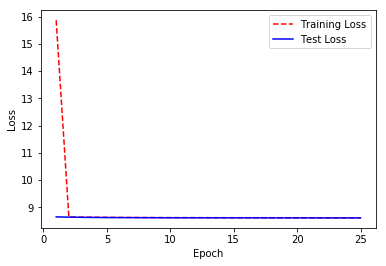

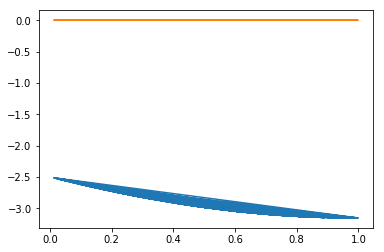

In [26]:
column=0
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_1_archicture_5

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.plot(X_test, Y_test)
predict=model.predict(X_test)
plt.plot(X_test, predict)

F_1_archicture_5=[X_test,Y_test,predict,history]


Run Time : 6.831118


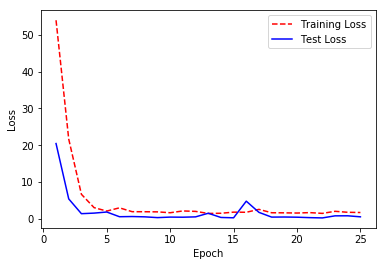

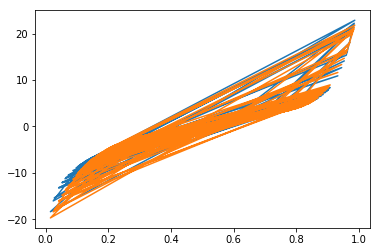

Run Time : 3.362455


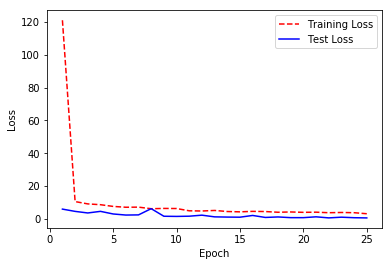

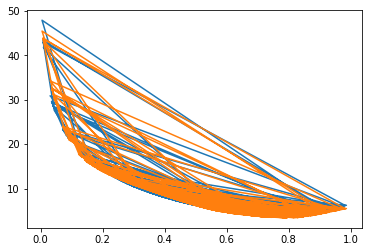

Run Time : 3.284854


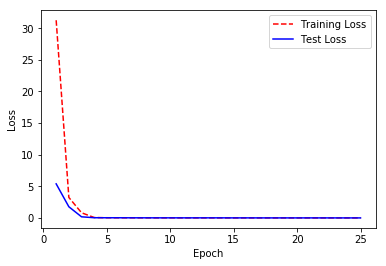

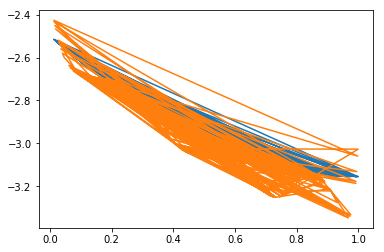

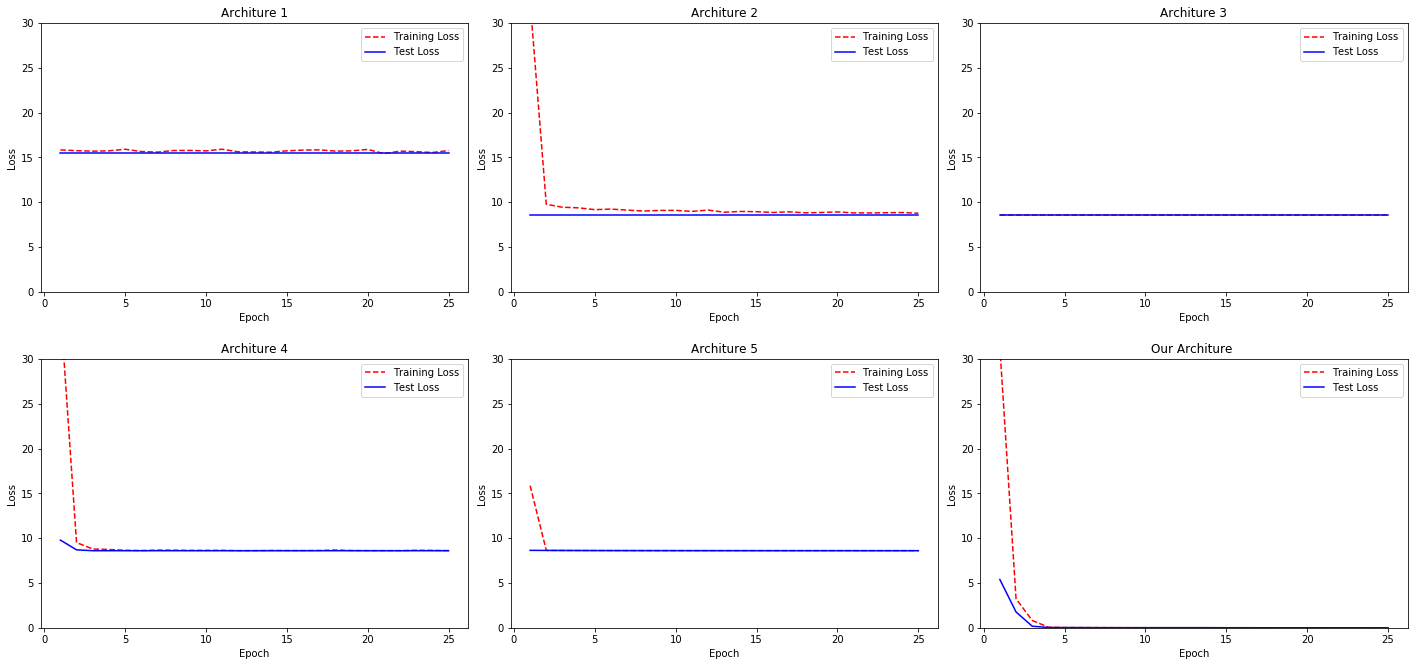

In [34]:
plot_loss(30,F_1_archicture_1[3],F_1_archicture_2[3],F_1_archicture_3[3],F_1_archicture_4[3],F_1_archicture_5[3],F_1_our_model[3],)

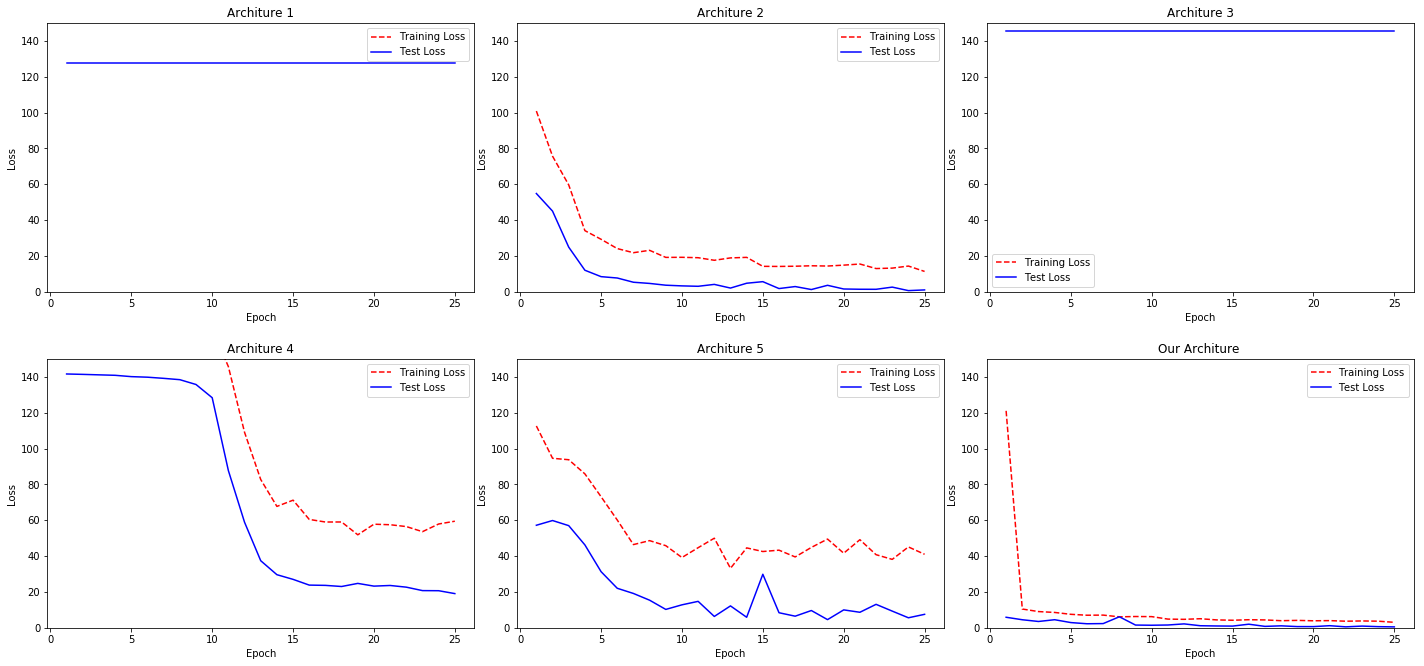

In [35]:
plot_loss(150,F_2_archicture_1[3],F_2_archicture_2[3],F_2_archicture_3[3],F_2_archicture_4[3],F_2_archicture_5[3],F_2_our_model[3],)

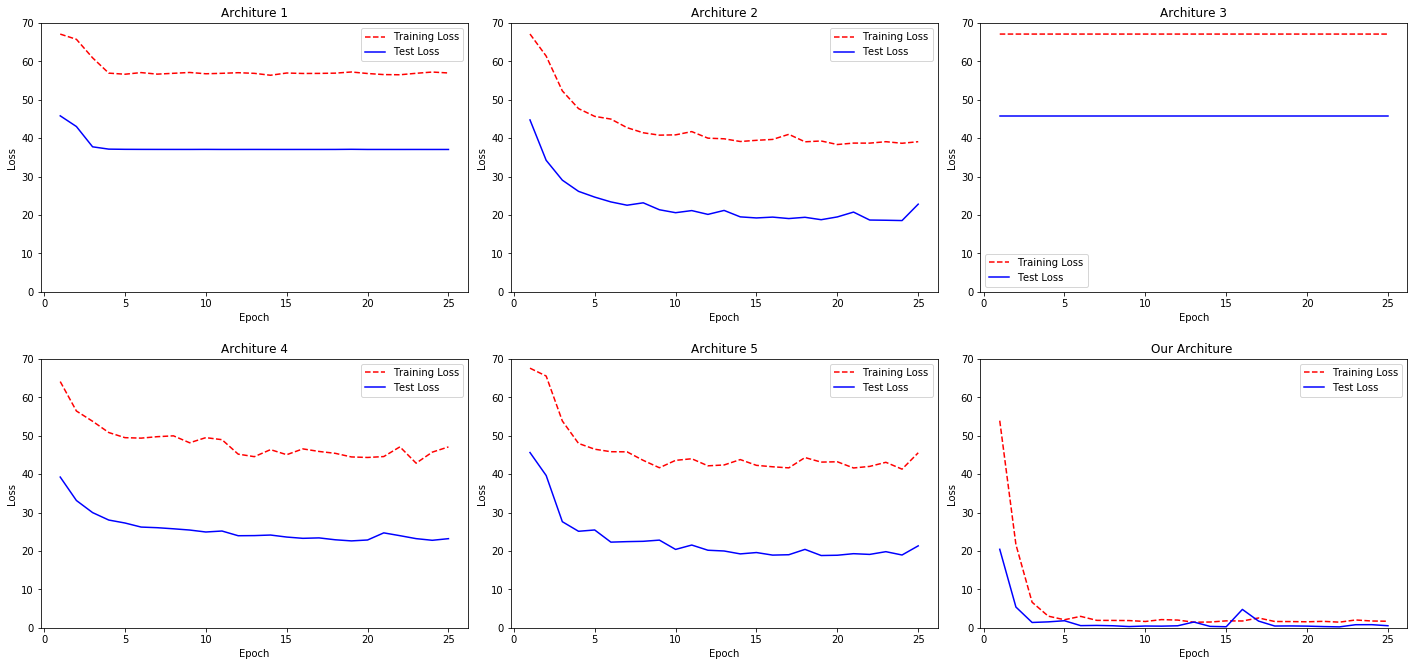

In [36]:
plot_loss(70,F_3_archicture_1[3],F_3_archicture_2[3],F_3_archicture_3[3],F_3_archicture_4[3],F_3_archicture_5[3],F_3_our_model[3],)

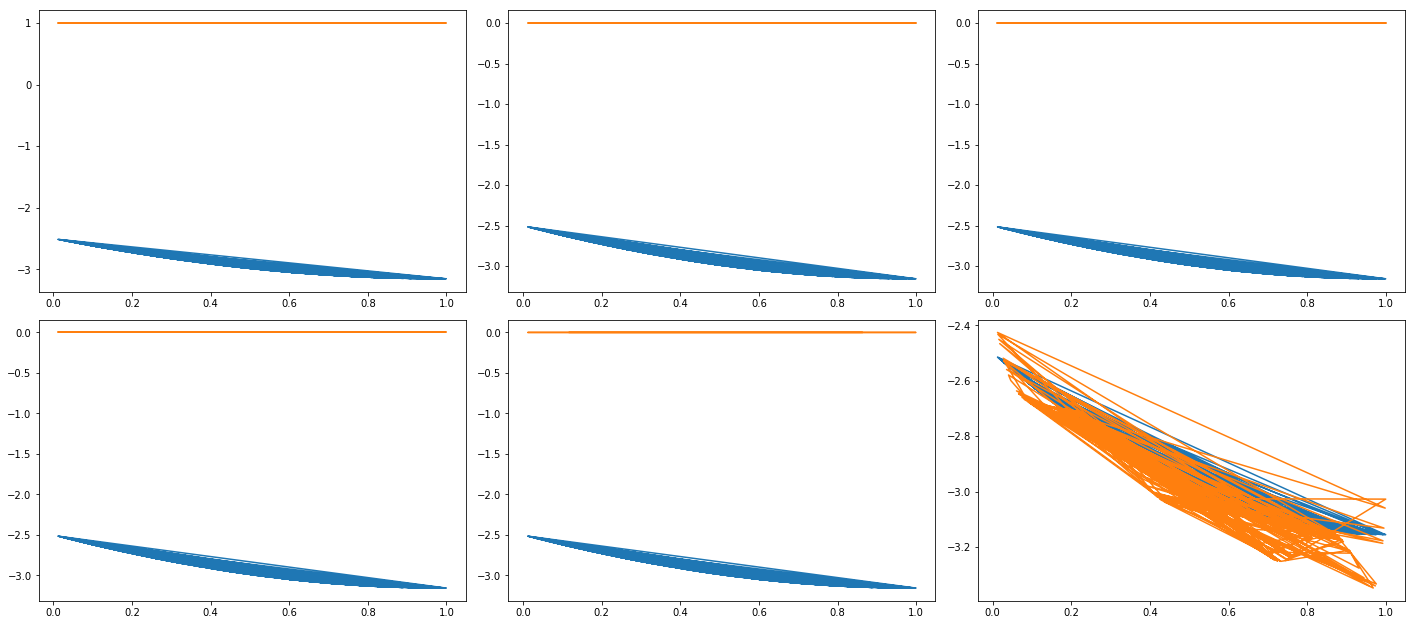

In [37]:
plot_shape(F_1_archicture_1,F_1_archicture_2,F_1_archicture_3,F_1_archicture_4,F_1_archicture_5,F_1_our_model,)


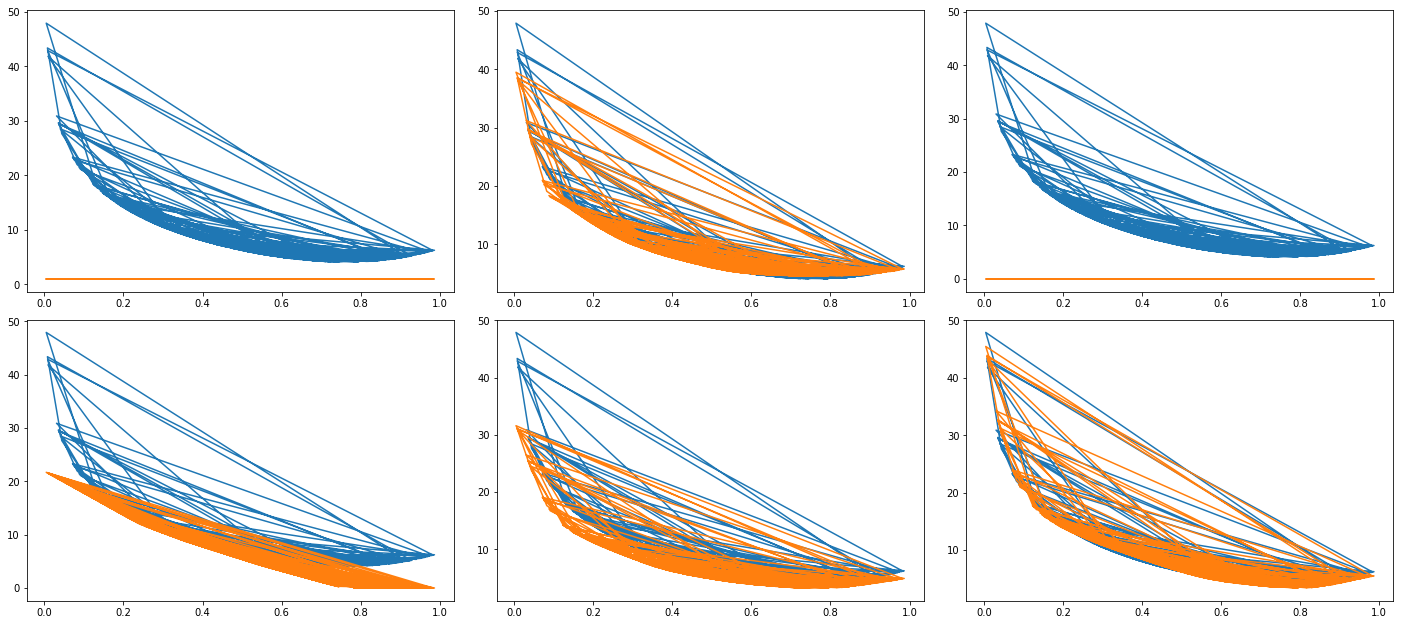

In [38]:
plot_shape(F_2_archicture_1,F_2_archicture_2,F_2_archicture_3,F_2_archicture_4,F_2_archicture_5,F_2_our_model,)


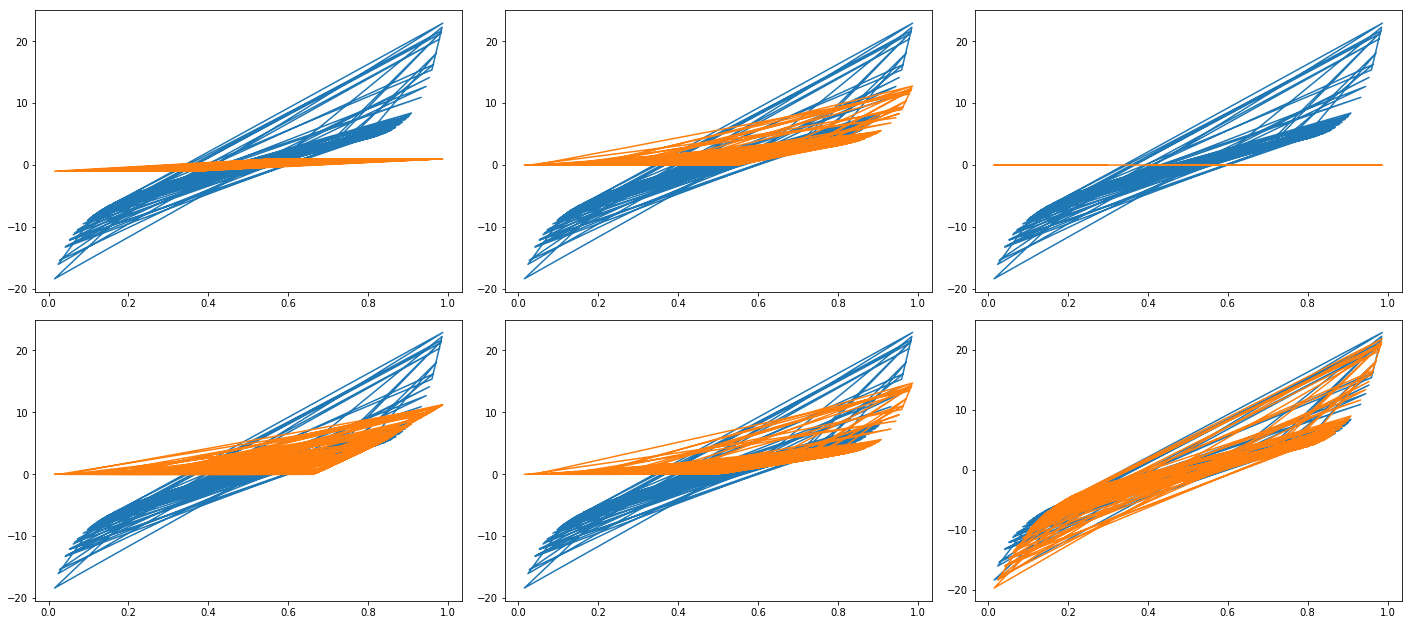

In [39]:
plot_shape(F_3_archicture_1,F_3_archicture_2,F_3_archicture_3,F_3_archicture_4,F_3_archicture_5,F_3_our_model)

Run Time : 4.391679


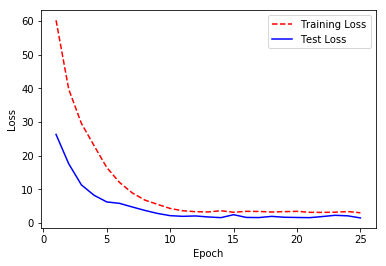

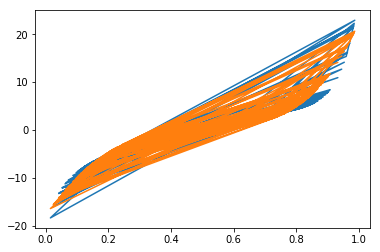

Run Time : 2.521822


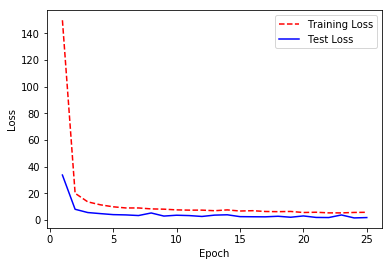

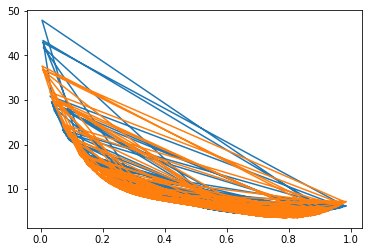

Run Time : 2.344914


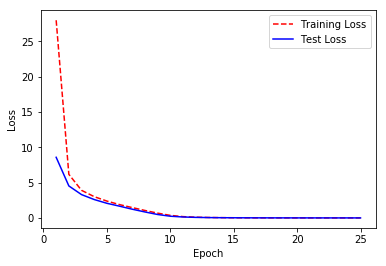

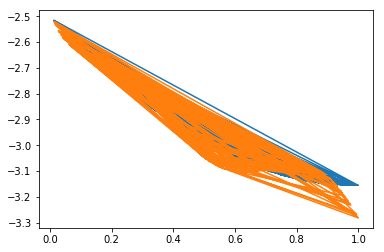

Run Time : 5.180532


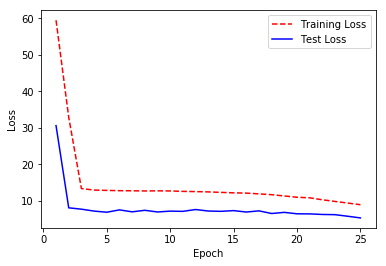

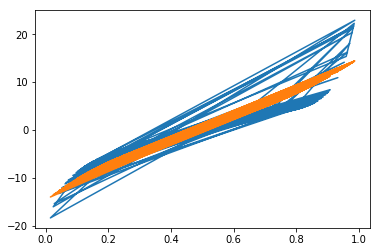

Run Time : 2.702499


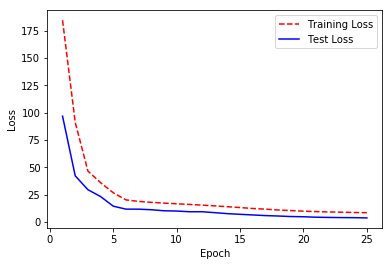

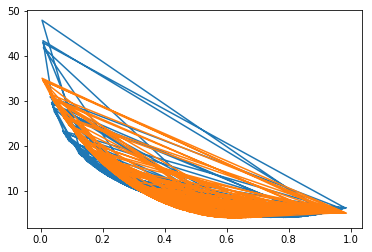

Run Time : 2.703010


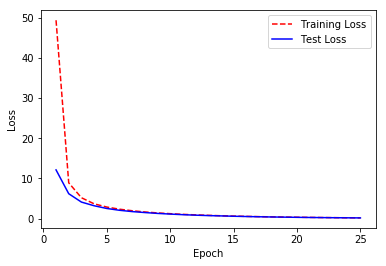

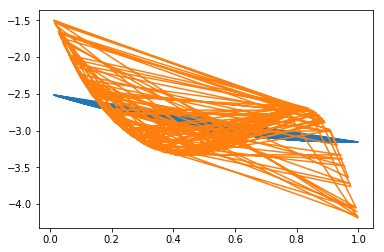